In [445]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm

sns.set_style('darkgrid')
sns.set_palette("colorblind6")
plt.rcParams['scatter.edgecolors'] = 'none'
plt.rcParams['patch.edgecolor'] = 'none'

# 1. Преварительный просмотр данных

In [446]:
data_path = os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), r'dataset/rent.csv')

df = pd.read_csv(data_path, sep=';')

In [447]:
df.head(10)

,rent,s,floor,rooms,district,walls,furniture
0,15000,35.0,5,1,3,1,1
1,16500,31.0,2,1,2,0,1
2,18000,30.0,4,1,3,1,1
3,30000,55.0,1,2,3,1,1
4,12000,19.0,3,1,2,1,1
5,18000,45.0,7,1,2,0,1
6,22500,65.0,4,2,3,1,1
7,13500,20.0,2,1,2,0,1
8,28500,50.0,4,1,1,1,1
9,11250,15.0,1,1,2,0,1


In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rent       130 non-null    int64  
 1   s          130 non-null    float64
 2   floor      130 non-null    int64  
 3   rooms      130 non-null    int64  
 4   district   130 non-null    int64  
 5   walls      130 non-null    int64  
 6   furniture  130 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 7.2 KB


Имеем заранее очищенные данные с числовыми признаками

# 2. Предварительная обработка данных

Проведем визуальный анализ распределений признаков

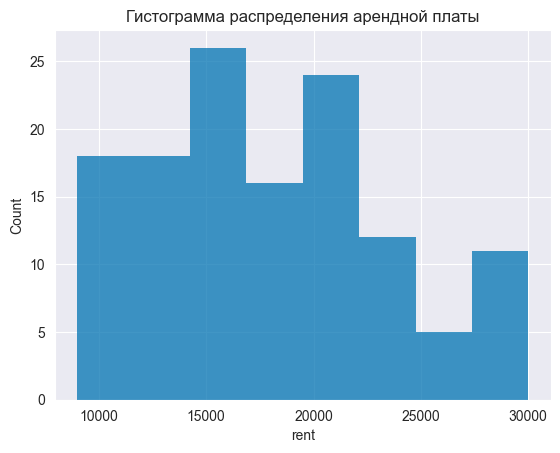

In [449]:
sns.histplot(df['rent'], bins=8)
plt.title('Гистограмма распределения арендной платы')
plt.show()

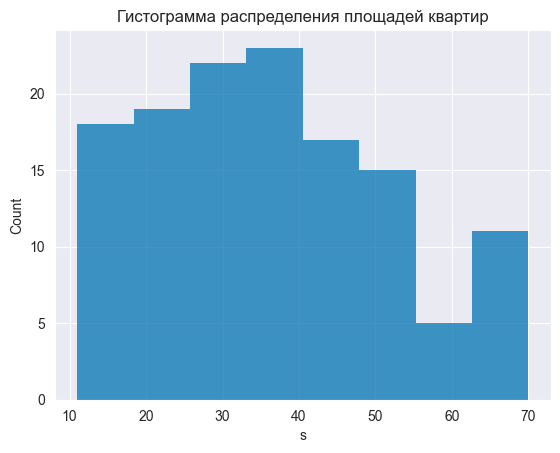

In [450]:
sns.histplot(df['s'], bins=8)
plt.title('Гистограмма распределения площадей квартир')
plt.show()

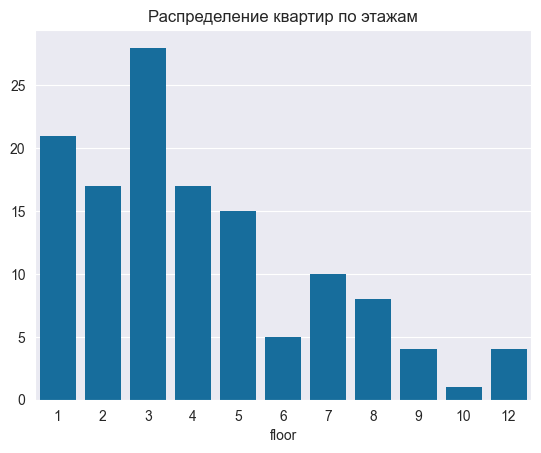

In [451]:
floors = df['floor'].value_counts().sort_index()

sns.barplot(x=floors.index, y=floors.values)
plt.title('Распределение квартир по этажам')
plt.show()

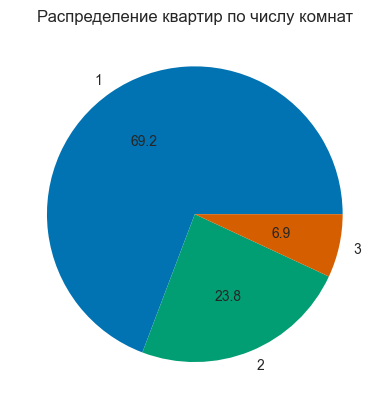

In [452]:
rooms = df['rooms'].value_counts().sort_index()

plt.pie(x=rooms.values, labels=rooms.index, autopct='%.1f')
plt.title('Распределение квартир по числу комнат')
plt.show()

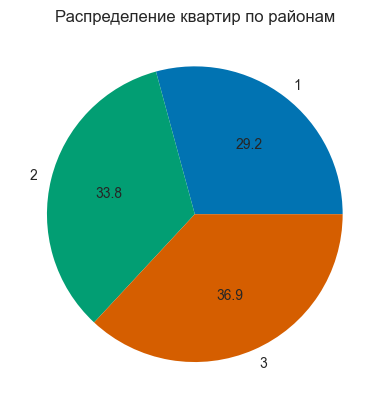

In [453]:
walls = df['district'].value_counts().sort_index()

plt.pie(x=walls.values, labels=walls.index, autopct='%.1f')
plt.title('Распределение квартир по районам')
plt.show()

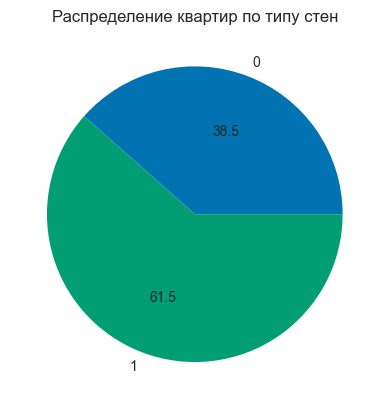

In [454]:
walls = df['walls'].value_counts().sort_index()

plt.pie(x=walls.values, labels=walls.index, autopct='%.1f')
plt.title('Распределение квартир по типу стен')
plt.show()

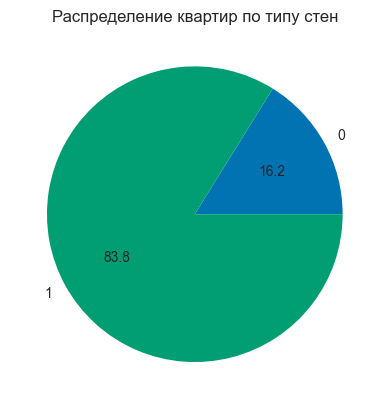

In [455]:
furnitures = df['furniture'].value_counts().sort_index()

plt.pie(x=furnitures.values, labels=furnitures.index, autopct='%.1f')
plt.title('Распределение квартир по типу стен')
plt.show()

## Описательные статистики

In [456]:
df[['floor', 'walls', 'district', 's', 'rent']].describe()

,floor,walls,district,s,rent
count,130.000000,130.000000,130.000000,130.000000,130.000000
mean,4.153846,0.615385,2.076923,36.439231,17890.384615
std,2.680569,0.488386,0.812837,15.753831,5608.686840
min,1.000000,0.000000,1.000000,11.000000,9000.000000
25%,2.000000,0.000000,1.000000,21.250000,13500.000000
50%,3.000000,1.000000,2.000000,36.000000,18000.000000
75%,5.000000,1.000000,3.000000,45.000000,21000.000000
max,12.000000,1.000000,3.000000,70.000000,30000.000000


Проверим на ассиметрию непрерывные признаки

In [457]:
df[['rent', 's']].skew()

rent    0.536873
s       0.328439
dtype: float64

Имеем небольшие правые хвосты, в целом - почти симметричное распределение

Проверим на эксцесс

In [458]:
df[['rent', 's']].kurtosis()

rent   -0.350727
s      -0.706654
dtype: float64

Оба распределения можно считать близкими к нормальному, но более плоскими, особенно что касается площади

## Проверка на нормальность

Выборка маленькая, поэтому используем критерий Шапиро-Уилка, гипотеза $H_0$ - что распределение нормальное

In [459]:
alpha = 0.05

p_val = stats.shapiro(df['rent'])[1]
print(f'Распределение "rent" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.1e})')

p_val = stats.shapiro(df['s'])[1]
print(f'Распределение "s" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.1e})')

Распределение "rent" - не нормальное (p_value = 9.6e-05)
Распределение "s" - не нормальное (p_value = 8.2e-04)


# 3. Сравнение групп

## 3.1. Анализ влияния категориальных признаков на rent

### Влияние walls на rent

In [460]:
# средняя аренда по типу стен
df.groupby('walls')[['rent']].mean()

,rent
walls,
0,17790.000
1,17953.125


C:\Users\torgovatel\AppData\Local\Temp\ipykernel_17700\499452268.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='walls', y='rent', showmeans=True, palette=sns.color_palette('colorblind6', 2))


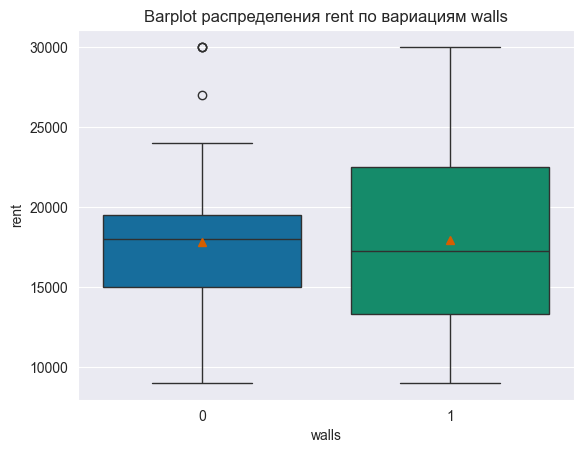

In [461]:
sns.boxplot(data=df, x='walls', y='rent', showmeans=True, palette=sns.color_palette('colorblind6', 2))
plt.title('Barplot распределения rent по вариациям walls')
plt.show()

Проверим на нормальность

In [462]:
df_w0 = df[df['walls'] == 0]['rent']
df_w1 = df[df['walls'] == 1]['rent']

# 0
p_val = stats.shapiro(df_w0)[1]
print(f'Распределение "rent" по "walls == 0" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.1e})')

# 1
p_val = stats.shapiro(df_w1)[1]
print(f'Распределение "rent" по "walls == 1" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.1e})')

Распределение "rent" по "walls == 0" - не нормальное (p_value = 7.7e-03)
Распределение "rent" по "walls == 1" - не нормальное (p_value = 1.0e-03)


Проверим на схожесть распределений

In [463]:
p_val = scipy.stats.mannwhitneyu(df_w0, df_w1)[1]
print(f'Распределения "rent" по вариациям "walls" - {'' if p_val > alpha else 'не'} схожи (p_value = {p_val:.1f})')

Распределения "rent" по вариациям "walls" -  схожи (p_value = 0.8)


### Влияние furniture на rent

In [464]:
# средняя аренда по наличию мебели
df.groupby('furniture')[['rent']].mean()

,rent
furniture,
0,12535.714286
1,18922.018349


C:\Users\torgovatel\AppData\Local\Temp\ipykernel_17700\2572215389.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='furniture', y='rent', showmeans=True, palette=sns.color_palette('colorblind6', 2))


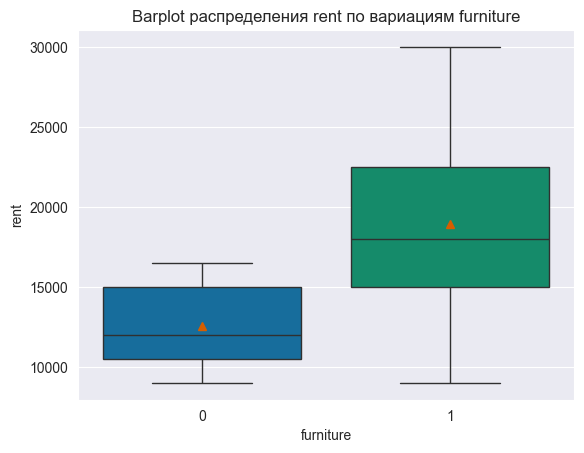

In [465]:
sns.boxplot(data=df, x='furniture', y='rent', showmeans=True, palette=sns.color_palette('colorblind6', 2))
plt.title('Barplot распределения rent по вариациям furniture')
plt.show()

Проверим нормальность

In [466]:
df_f0 = df[df['furniture'] == 0]['rent']
df_f1 = df[df['furniture'] == 1]['rent']

# 0
p_val = stats.shapiro(df_f0)[1]
print(f'Распределение "rent" по "furniture == 0" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.1e})')

# 1
p_val = stats.shapiro(df_f1)[1]
print(f'Распределение "rent" по "furniture == 1" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.1e})')

Распределение "rent" по "furniture == 0" - не нормальное (p_value = 1.9e-02)
Распределение "rent" по "furniture == 1" - не нормальное (p_value = 1.5e-03)


Проверим на схожесть распределений

In [467]:
p_val = scipy.stats.mannwhitneyu(df_f0, df_f1)[1]
print(f'Распределения "rent" по вариациям "furniture" - {'' if p_val > alpha else 'не'} схожи (p_value = {p_val:.1e})')

Распределения "rent" по вариациям "furniture" - не схожи (p_value = 2.0e-07)


### Влияние district на rent

In [468]:
# средняя аренда по району
df.groupby('district')[['rent']].mean()

,rent
district,
1,19894.736842
2,15375.000000
3,18609.375000


In [469]:
df['district'].value_counts()

district
3    48
2    44
1    38
Name: count, dtype: int64

C:\Users\torgovatel\AppData\Local\Temp\ipykernel_17700\3396184497.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='district', y='rent', showmeans=True, palette=sns.color_palette('colorblind6', 3))


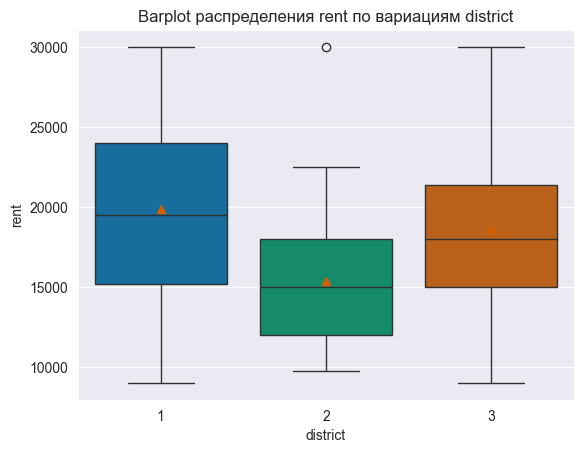

In [470]:
sns.boxplot(data=df, x='district', y='rent', showmeans=True, palette=sns.color_palette('colorblind6', 3))
plt.title('Barplot распределения rent по вариациям district')
plt.show()

Обработаем выброс

In [471]:
df.loc[(df['rent'] > 25000) & (df['district'] == 2)]

,rent,s,floor,rooms,district,walls,furniture
37,30000,64.0,3,3,2,0,1


In [472]:
df=df.drop(df.index[[37]])
df.reset_index(inplace=True)

Проверим на нормальность

In [473]:
df_d1 = np.array(df[df['district'] == 1]['rent'])
df_d2 = np.array(df[df['district'] == 2]['rent'])
df_d3 = np.array(df[df['district'] == 3]['rent'])

# 1
p_val = stats.shapiro(df_d1)[1]
print(f'Распределение "rent" по "district == 1" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.4f})')

# 2
p_val = stats.shapiro(df_d2)[1]
print(f'Распределение "rent" по "district == 2" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.4f})')

# 3
p_val = stats.shapiro(df_d3)[1]
print(f'Распределение "rent" по "district == 3" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.4f})')

Распределение "rent" по "district == 1" -  нормальное (p_value = 0.3939)
Распределение "rent" по "district == 2" - не нормальное (p_value = 0.0152)
Распределение "rent" по "district == 3" - не нормальное (p_value = 0.0335)


Пусть одно распределение нормальное, одно близко к нему а одно явно не нормальное, будем считать что в совокупности они не являются нормальными

Проверим схожесть медиан данных совокупностей по критерию Краскала-Уоллиса

In [474]:
p_val = stats.mstats.kruskalwallis(df_d1, df_d2, df_d3)[1]
print(f'Медианы распределения "rent" по вариациям "district" - {'' if p_val > alpha else 'не'} схожи (p_value = {p_val:.1e})')

Медианы распределения "rent" по вариациям "district" - не схожи (p_value = 2.6e-04)


## 3.2. Анализ влияния категориальных признаков на s

### Влияние walls на s

In [475]:
# средняя площадь по типу стен
df.groupby('walls')[['s']].mean()

,s
walls,
0,39.042857
1,34.500000


C:\Users\torgovatel\AppData\Local\Temp\ipykernel_17700\590787749.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='walls', y='s', showmeans=True, palette=sns.color_palette('colorblind6', 2))


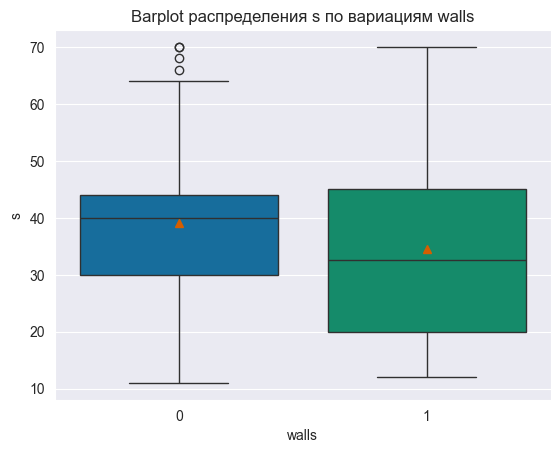

In [476]:
sns.boxplot(data=df, x='walls', y='s', showmeans=True, palette=sns.color_palette('colorblind6', 2))
plt.title('Barplot распределения s по вариациям walls')
plt.show()

Проверим на нормальность

In [477]:
df_w0 = df[df['walls'] == 0]['s']
df_w1 = df[df['walls'] == 1]['s']

# 0
p_val = stats.shapiro(df_w0)[1]
print(f'Распределение "s" по "walls == 0" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.3f})')

# 1
p_val = stats.shapiro(df_w1)[1]
print(f'Распределение "s" по "walls == 1" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.3f})')

Распределение "s" по "walls == 0" -  нормальное (p_value = 0.129)
Распределение "s" по "walls == 1" - не нормальное (p_value = 0.003)


Проверим на схожесть распределений

In [478]:
p_val = scipy.stats.mannwhitneyu(df_w0, df_w1)[1]
print(f'Распределения "s" по вариациям "walls" - {'' if p_val > alpha else 'не'} схожи (p_value = {p_val:.1f})')

Распределения "s" по вариациям "walls" -  схожи (p_value = 0.1)


### Влияние furniture на s

In [479]:
# средняя площадь по наличию мебели
df.groupby('furniture')[['s']].mean()

,s
furniture,
0,21.904762
1,39.010185


C:\Users\torgovatel\AppData\Local\Temp\ipykernel_17700\1662016969.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='furniture', y='s', showmeans=True, palette=sns.color_palette('colorblind6', 2))


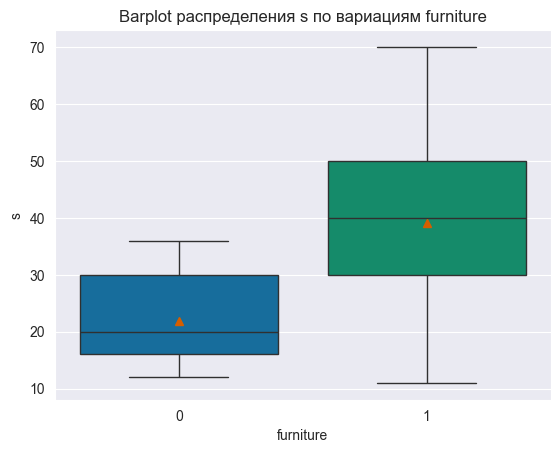

In [480]:
sns.boxplot(data=df, x='furniture', y='s', showmeans=True, palette=sns.color_palette('colorblind6', 2))
plt.title('Barplot распределения s по вариациям furniture')
plt.show()

Проверим нормальность

In [481]:
df_f0 = df[df['furniture'] == 0]['s']
df_f1 = df[df['furniture'] == 1]['s']

# 0
p_val = stats.shapiro(df_f0)[1]
print(f'Распределение "s" по "furniture == 0" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.3f})')

# 1
p_val = stats.shapiro(df_f1)[1]
print(f'Распределение "s" по "furniture == 1" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.3f})')

Распределение "s" по "furniture == 0" - не нормальное (p_value = 0.010)
Распределение "s" по "furniture == 1" - не нормальное (p_value = 0.028)


Проверим на схожесть распределений

In [482]:
p_val = scipy.stats.mannwhitneyu(df_f0, df_f1)[1]
print(f'Распределения "s" по вариациям "furniture" - {'' if p_val > alpha else 'не'} схожи (p_value = {p_val:.1e})')

Распределения "s" по вариациям "furniture" - не схожи (p_value = 3.6e-06)


### Влияние district на rent

In [483]:
# средняя площадь по району
df.groupby('district')[['s']].mean()

,s
district,
1,37.078947
2,32.711628
3,38.697917


In [484]:
df['district'].value_counts()

district
3    48
2    43
1    38
Name: count, dtype: int64

C:\Users\torgovatel\AppData\Local\Temp\ipykernel_17700\2596932166.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='district', y='s', showmeans=True, palette=sns.color_palette('colorblind6', 3))


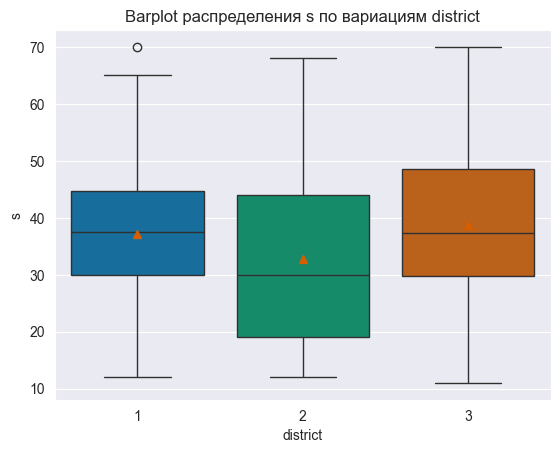

In [485]:
sns.boxplot(data=df, x='district', y='s', showmeans=True, palette=sns.color_palette('colorblind6', 3))
plt.title('Barplot распределения s по вариациям district')
plt.show()

Обработаем выброс

In [486]:
df.loc[(df['s'] >= 70) & (df['district'] == 1)]

,index,rent,s,floor,rooms,district,walls,furniture
66,67,28500,70.0,9,3,1,1,1


In [487]:
df=df.drop(df.index[[66]])
df.reset_index(inplace=True)

Проверим на нормальность

In [488]:
df_d1 = np.array(df[df['district'] == 1]['s'])
df_d2 = np.array(df[df['district'] == 2]['s'])
df_d3 = np.array(df[df['district'] == 3]['s'])

# 1
p_val = stats.shapiro(df_d1)[1]
print(f'Распределение "s" по "district == 1" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.4f})')

# 2
p_val = stats.shapiro(df_d2)[1]
print(f'Распределение "s" по "district == 2" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.4f})')

# 3
p_val = stats.shapiro(df_d3)[1]
print(f'Распределение "s" по "district == 3" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.4f})')

Распределение "s" по "district == 1" -  нормальное (p_value = 0.5862)
Распределение "s" по "district == 2" - не нормальное (p_value = 0.0047)
Распределение "s" по "district == 3" -  нормальное (p_value = 0.1030)


Имеем два нормальных распределения и одно явно не нормальное, что в совокупности следует воспринимать как не нормальное распределение

Проверим схожесть медиан данных совокупностей по критерию Краскала-Уоллиса

In [489]:
p_val = stats.mstats.kruskalwallis(df_d1, df_d2, df_d3)[1]
print(f'Медианы распределения "s" по вариациям "district" - {'' if p_val > alpha else 'не'} схожи (p_value = {p_val:.1e})')

Медианы распределения "s" по вариациям "district" -  схожи (p_value = 1.9e-01)


# 4. Корреляционный анализ

## 4.1. Анализ количественных и порядковых признаков

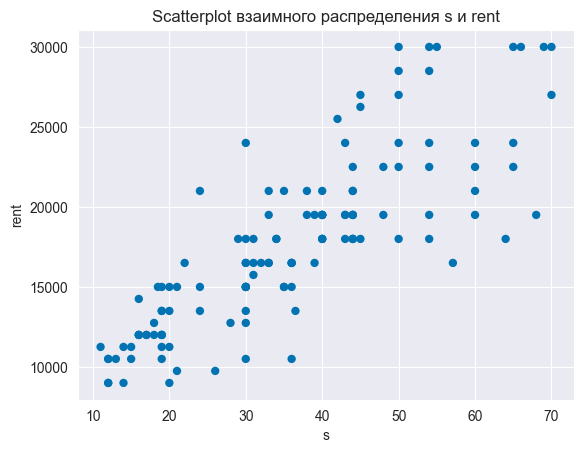

In [490]:
sns.scatterplot(data=df, x='s', y='rent', edgecolors='none')
plt.title('Scatterplot взаимного распределения s и rent')
plt.show()

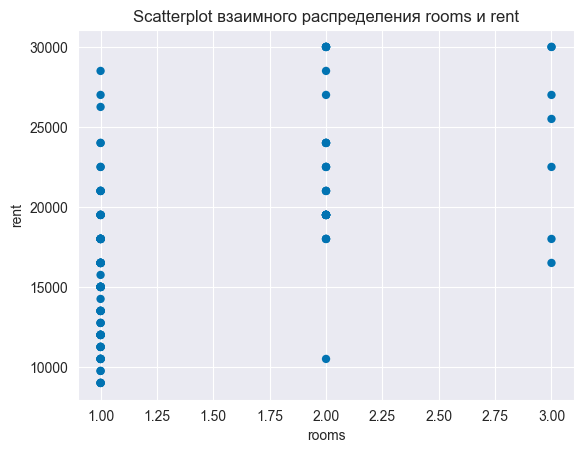

In [491]:
sns.scatterplot(data=df, x='rooms', y='rent', edgecolors='none')
plt.title('Scatterplot взаимного распределения rooms и rent')
plt.show()

C:\Users\torgovatel\AppData\Local\Temp\ipykernel_17700\2452242367.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='rooms', y='rent', showmeans=True, palette=sns.color_palette('colorblind6', 3))


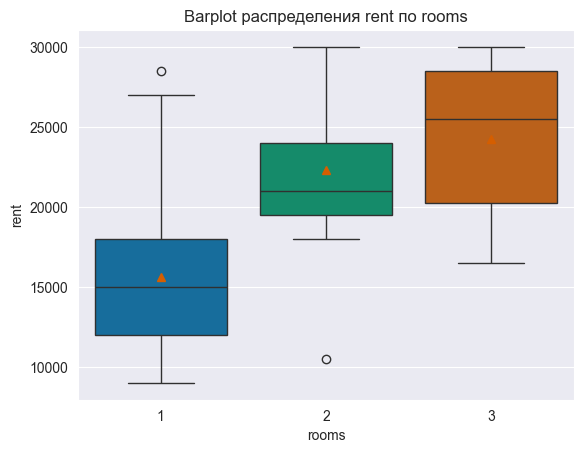

In [492]:
sns.boxplot(data=df, x='rooms', y='rent', showmeans=True, palette=sns.color_palette('colorblind6', 3))
plt.title('Barplot распределения rent по rooms')
plt.show()

Рассчет корреляции Пирсона для непрерывных наблюдений (для эксперимента добавим rooms)

In [493]:
df[['rent','s','rooms']].corr()

,rent,s,rooms
rent,1.000000,0.823638,0.576642
s,0.823638,1.000000,0.718317
rooms,0.576642,0.718317,1.000000


Рассчет ранговой корреляции Спирмена для непрерывных наблюдений (для эксперимента добавим непрерывные признаки)

In [494]:
df[['rent','s','rooms','floor']].corr(method='spearman')

,rent,s,rooms,floor
rent,1.000000,0.854181,0.589476,0.372648
s,0.854181,1.000000,0.707821,0.401158
rooms,0.589476,0.707821,1.000000,0.136588
floor,0.372648,0.401158,0.136588,1.000000


Визуализация

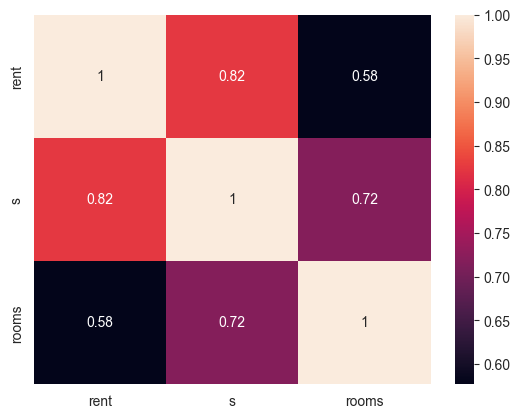

In [495]:
num_cols = ['rent', 's', 'rooms']
hm = sns.heatmap(df[num_cols].corr(), annot=True)
plt.show()

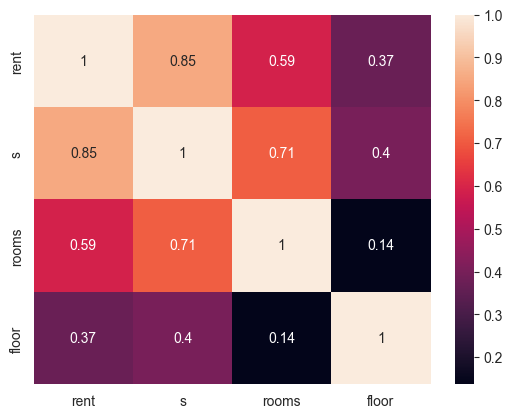

In [496]:
ran_cols = ['rent', 's','rooms','floor']
hm = sns.heatmap(df[ran_cols].corr(method = 'spearman'), annot=True)

Проверим гипотезу $H_0$ о нулевой корреляции для некоторых выявившихся пар признаков

In [497]:
p_val = scipy.stats.pearsonr(df['rent'], df['s'])[1]

print(f'Теоретическая корреляция признаков (rent, s) {'=' if p_val > alpha else '!='} 0 (p_value = {p_val:.1e})')

Теоретическая корреляция признаков (rent, s) != 0 (p_value = 7.9e-33)


In [498]:
p_val = scipy.stats.pearsonr(df['rent'], df['rooms'])[1]

print(f'Теоретическая корреляция признаков (rent, rooms) {'=' if p_val > alpha else '!='} 0 (p_value = {p_val:.1e})')

Теоретическая корреляция признаков (rent, rooms) != 0 (p_value = 1.1e-12)


In [499]:
p_val = scipy.stats.spearmanr(df['rent'], df['floor'])[1]

print(f'Теоретическая корреляция признаков (rent, floor) {'=' if p_val > alpha else '!='} 0 (p_value = {p_val:.1e})')

Теоретическая корреляция признаков (rent, floor) != 0 (p_value = 1.5e-05)


In [500]:
p_val = scipy.stats.spearmanr(df['s'], df['rooms'])[1]

print(f'Теоретическая корреляция признаков (s, rooms) {'=' if p_val > alpha else '!='} 0 (p_value = {p_val:.1e})')

Теоретическая корреляция признаков (s, rooms) != 0 (p_value = 9.5e-21)


## 4.2. Связь категориальных признаков

Анализируем через таблицы сопряженности

### Связь walls и furniture

In [501]:
WF = pd.crosstab(df['walls'], df['furniture'])
WF

furniture,0,1
walls,,
0,7,42
1,14,65


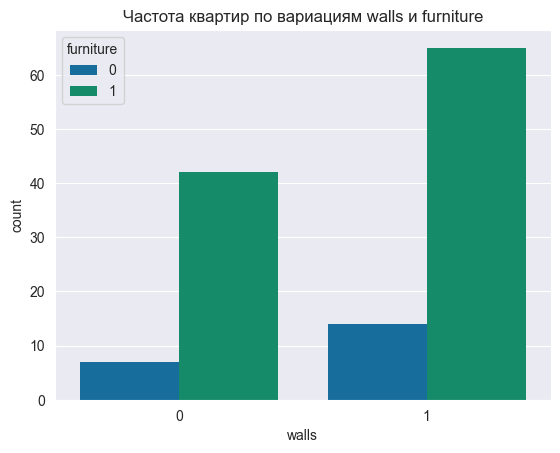

In [502]:
sns.countplot(x=df['walls'], hue=df['furniture'])
plt.title('Частота квартир по вариациям walls и furniture')
plt.show()

Проведем тест по $H_0$ - независимость распределений в вероятностном смысле

In [503]:
chi2, p_val, f, expected = scipy.stats.chi2_contingency(WF)
output = "статистика: {}\nстепени свободы: {}\np-value: {}\n"

print(output.format( chi2, f, p_val))
print(f'Зависимость между признками (walls, furniture) {'присутствует' if p_val >= alpha else 'отсутствует'} (p_value = {p_val:.1e})')

статистика: 0.07006189946191926
степени свободы: 1
p-value: 0.7912466759255427

Зависимость между признками (walls, furniture) присутствует (p_value = 7.9e-01)


Причем исходя из величины p-value видно, что эта зависимость очень надежная

### Связь walls и district

In [504]:
WD = pd.crosstab(df['walls'], df['district'])
WD

district,1,2,3
walls,,,
0,9,23,17
1,28,20,31


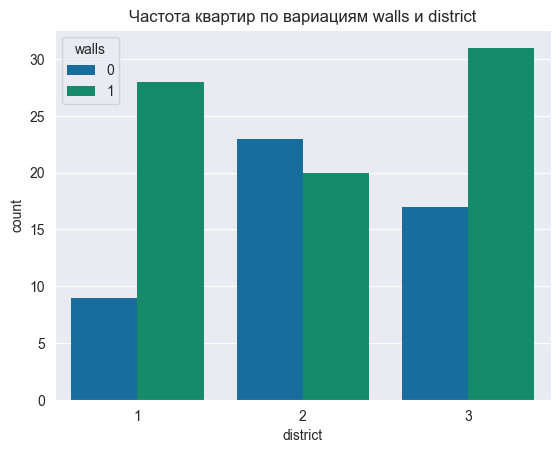

In [505]:
sns.countplot(x=df['district'], hue=df['walls'])
plt.title('Частота квартир по вариациям walls и district')
plt.show()

Проведем тест по $H_0$ - независимость распределений в вероятностном смысле

In [506]:
chi2, p_val, f, expected = scipy.stats.chi2_contingency(WD)
output = "статистика: {}\nстепени свободы: {}\np-value: {}\n"

print(output.format( chi2, f, p_val))
print(f'Зависимость между признками (walls, district) {'присутствует' if p_val >= alpha else 'отсутствует'} (p_value = {p_val:.1e})')

статистика: 7.426068544197986
степени свободы: 2
p-value: 0.024403364371774646

Зависимость между признками (walls, district) отсутствует (p_value = 2.4e-02)


# 5. Регрессионный анализ

## 5.1. Парная регрессия

Проведем визуализацию по непрерывным признакам, где связь видна невооруженным взглядом

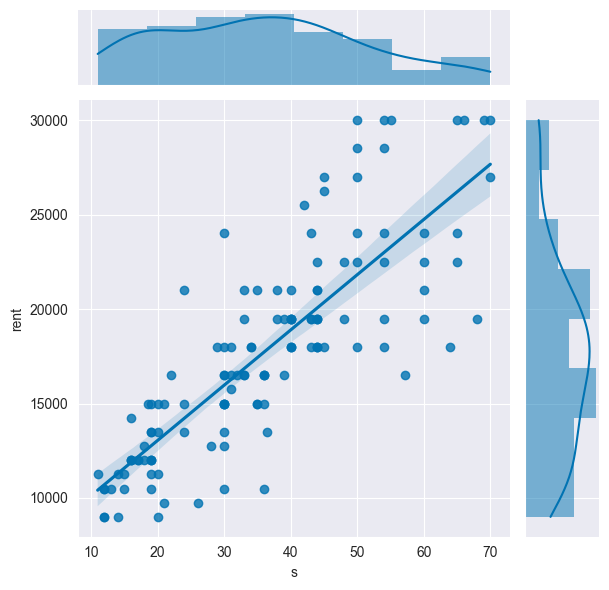

In [507]:
sns.jointplot(data=df, x='s', y='rent', kind='reg')
plt.show()

Построим модель парной регрессии

In [508]:
LR = lm.LinearRegression()
pair_model = LR.fit(df[['s']], df[['rent']])

In [509]:
print(f'Уравнение: {pair_model.coef_[0][0]:.3f}*x + {pair_model.intercept_[0]:.3f}')

Уравнение: 292.443*x + 7196.130


Оцени коэффициент детерминации

In [510]:
r2 = pair_model.score(df[['s']], df[['rent']])
r2

0.678379381541778

Получается что на $\approx 67.83%$ прогноз модели обусловлен признаками, а остаток - шумом

## 5.2. Парная регрессия (OLS). Статистический подход.

In [511]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [512]:
pair_res = smf.ols('rent ~ s', data=df).fit()
pair_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     265.8
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           7.87e-33
Time:                        19:57:17   Log-Likelihood:                -1210.1
No. Observations:                 128   AIC:                             2424.
Df Residuals:                     126   BIC:                             2430.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7196.1304    701.312     10.261      0.000    5808.255    8584.006
s            292.4432     17.939     16.302      0.000     256.943     327.943
==============================================================================
Omnibus:                        4.006   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.135   Jarque-Bera (JB):                3.839
Skew:                           0.246   Prob(JB):                        0.147
Kurtosis:                       3.691   Cond. No.                         99.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**На основе summary можем сделать выводы о параметрах модели:**  
1. F-statistic p_value $< \alpha=0.05\ \Rightarrow$ отклоняем гипотезу $H_0:\ R^2=0$ о неадекватности модели по теоретической детерминации равной нулю
2. Параметры уравнения оба имеют p_value $<\alpha=0.05 \Rightarrow$ отклоняем гипотезу $H_0:\ a_k=0$  

**И выводы об остатках:**  
1. Статистика Дарбина-Ватсона, принимающая значения в интервале $[0,4]$ в данном случае $\approx 2 \Rightarrow$ будем считать что автокорреляции остатков нет
2. Небольшая правостороняя ассиметрия остатков
3. Эксцесс около 3, что говорит о близости к нормальному распределению
4. По критерию Жарка-Бера гипотеза $H_0$ - данные распределены по нормальному закону, принимается, т.к. p_value $\ge \alpha=0.05$


## 5.3. Множественная регрессия

In [513]:
X = df[['s','rooms','floor','walls','furniture']]
X

,s,rooms,floor,walls,furniture
0,35.0,1,5,1,1
1,31.0,1,2,0,1
2,30.0,1,4,1,1
3,55.0,2,1,1,1
4,19.0,1,3,1,1
...,...,...,...,...,...
123,54.0,2,7,1,1
124,54.0,2,1,1,1
125,54.0,2,3,0,1
126,12.0,1,4,1,0


In [514]:
Y = df[['rent']]
Y

,rent
0,15000
1,16500
2,18000
3,30000
4,12000
...,...
123,30000
124,28500
125,19500
126,10500


In [515]:
mlt_model = LR.fit(X, Y)

print('Свободный член уравнения:')
print(mlt_model.intercept_[0])
print()

print('Коэффициенты уравнения:')
print(*mlt_model.coef_[0], sep='\n')

Свободный член уравнения:
5150.136081894318

Коэффициенты уравнения:
291.0669311990992
-122.86079126357578
-12.822905917068482
1758.5656735555858
1470.2907805315247


Посмотрим на коэффициент детерминации модели

In [516]:
r2 = mlt_model.score(X,Y)
r2

0.7115775361988548

Произведем прогноз

In [517]:
x_new = [[54, 2, 5, 1, 1]] # s, rooms, floor, walls, furniture
y_new = mlt_model.predict(x_new)[0][0]

print("Прогноз цены: ", y_new.round(0))

Прогноз цены:  23787.0


c:\Users\torgovatel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 5.4. Множественная регрессия (OLS)

In [518]:
mlt_res1 = smf.ols('rent ~ s + rooms + floor + walls + furniture' , data=df).fit()
mlt_res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     60.20
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           2.58e-31
Time:                        19:57:17   Log-Likelihood:                -1203.2
No. Observations:                 128   AIC:                             2418.
Df Residuals:                     122   BIC:                             2435.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5150.1361    957.620      5.378      0.000    3254.432    7045.840
s            291.0669     28.880     10.079      0.000     233.897     348.237
rooms       -122.8608    675.669     -0.182      0.856   -1460.415    1214.694
floor        -12.8229    111.934     -0.115      0.909    -234.407     208.761
walls       1758.5657    553.610      3.177      0.002     662.640    2854.491
furniture   1470.2908    782.964      1.878      0.063     -79.665    3020.247
==============================================================================
Omnibus:                        0.251   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.882   Jarque-Bera (JB):                0.092
Skew:                           0.062   Prob(JB):                        0.955
Kurtosis:                       3.046   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Результат:*
- Нормальное распределение остатков
- Подорительные коэффициенты при *rooms, floor*
- Выполнение гипотезы о равенстве нулю коэффициентов при *rooms, floor*

Ситуация с коэффициентами и гипотезой связана с мультиколлинеарностью в случае rooms, т.к. выше доказана его связь с признаком s

Признак *floors* уберем, т.к. p_value крайне высокое и подтверждает равенство коэффициента нулю, а *furniture* оставим, т.к. значение граничное и возможно из-за перераспределения дисперсии в последствии изменится в лучшую сторону

## 5.5. Кодирование категориальных значений

In [519]:
df01 = pd.concat((df, pd.get_dummies(df.district, prefix="d", prefix_sep='')), axis=1)
df01

,level_0,index,rent,s,floor,rooms,district,walls,furniture,d1,d2,d3
0,0,0,15000,35.0,5,1,3,1,1,False,False,True
1,1,1,16500,31.0,2,1,2,0,1,False,True,False
2,2,2,18000,30.0,4,1,3,1,1,False,False,True
3,3,3,30000,55.0,1,2,3,1,1,False,False,True
4,4,4,12000,19.0,3,1,2,1,1,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
123,124,125,30000,54.0,7,2,1,1,1,True,False,False
124,125,126,28500,54.0,1,2,1,1,1,True,False,False
125,126,127,19500,54.0,3,2,2,0,1,False,True,False
126,127,128,10500,12.0,4,1,3,1,0,False,False,True


Убираем признак d3 т.к. он выражается через d1 и d2 и порождает мультиколлинеарность

In [520]:
mlt_res2 = smf.ols('rent ~ s + walls + furniture + d1 + d2 ', data=df01).fit()
mlt_res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     80.27
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           6.60e-37
Time:                        19:57:17   Log-Likelihood:                -1189.5
No. Observations:                 128   AIC:                             2391.
Df Residuals:                     122   BIC:                             2408.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5794.0951    932.331      6.215      0.000    3948.452    7639.738
d1[T.True]  1846.3753    597.661      3.089      0.002     663.246    3029.504
d2[T.True] -1533.5026    585.775     -2.618      0.010   -2693.102    -373.903
s            273.5371     17.436     15.688      0.000     239.022     308.052
walls       1055.5335    514.444      2.052      0.042      37.140    2073.927
furniture   1689.0177    709.819      2.380      0.019     283.860    3094.175
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.434
Skew:                          -0.111   Prob(JB):                        0.805
Kurtosis:                       2.821   Cond. No.                         181.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Результат:**
- Нормальное распределение остатков
- Все коэффициенты значимы
- Автокорреляция остатков практически отсутствует
- Высокая деретминация $R^2\approx 0.767$, значимость которой подтверждается p-value по F-статистике.

Это и будет финальной моделью.

**P.S.** Из интересного - по свободному члену можем понять что за сам факт аренды платится 5794 рубля

И на всякий случай, окончательно убедимся что число комнат влияет на арендную плату

In [521]:
results2 = smf.ols('rent ~ rooms', data=df01).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     62.77
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           1.05e-12
Time:                        19:57:18   Log-Likelihood:                -1256.9
No. Observations:                 128   AIC:                             2518.
Df Residuals:                     126   BIC:                             2523.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.041e+04   1003.743     10.368      0.000    8420.261    1.24e+04
rooms       5405.7807    682.320      7.923      0.000    4055.490    6756.071
==============================================================================
Omnibus:                        4.078   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                3.708
Skew:                           0.413   Prob(JB):                        0.157
Kurtosis:                       3.116   Cond. No.                         5.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Модель адекватная, коэффициенты значимы а детерминация от одного фактора *rooms* достигает $\frac{1}{3}$, что доказывает влияние признака на целевой показатель